In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = np.genfromtxt('ej-ajuste-04.txt')

In [4]:
x = datos[:,0]
y = datos[:,1]
Dy = datos[:,2]

(0, 7)

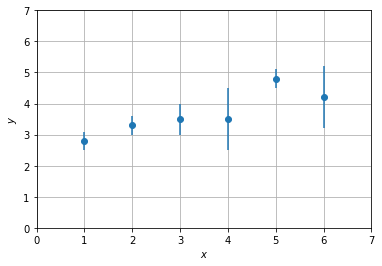

In [9]:
plt.errorbar(x,y,Dy,fmt='o')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,7)
plt.ylim(0,7)

In [10]:
W = 1/(Dy**2)

In [11]:
b0 = (((np.sum(W*y))*(np.sum(W*x**2)))- ((np.sum(W*x*y))*(np.sum(W*x)))) /(((np.sum(W))*(np.sum(W*x**2)))- ((np.sum(W*x))**2))

In [12]:
b1 = (((np.sum(W))*(np.sum(W*x*y)))- ((np.sum(W*x))*(np.sum(W*y)))) /(((np.sum(W))*(np.sum(W*x**2)))- ((np.sum(W*x))**2))

In [13]:
print('pendiente =' , b1)
print('coeficiente de posición =', b0)

pendiente = 0.457131226109
coeficiente de posición = 2.34204247555


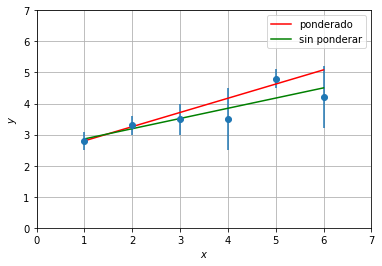

In [22]:
xx = np.linspace(1,6,100)
plt.plot(xx,b0+b1*xx, color= 'red',label='ponderado')
plt.plot(xx,np.polyval(np.polyfit(x,y,1),xx), color= 'green',label='sin ponderar')
plt.errorbar(x,y,Dy,fmt='o')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,7)
plt.ylim(0,7)
plt.legend()

In [21]:
np.polyfit(x,y,1,w=1/Dy)

array([ 0.45713123,  2.34204248])

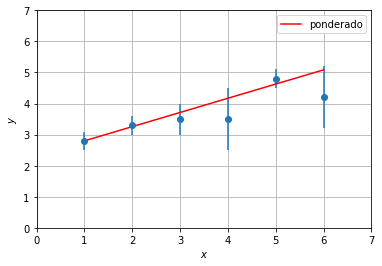

In [24]:
xx = np.linspace(1,6,100)
plt.plot(xx,b0+b1*xx, color= 'red',label='ponderado')
plt.errorbar(x,y,Dy,fmt='o')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,7)
plt.ylim(0,7)
plt.legend()

(-2, 2)

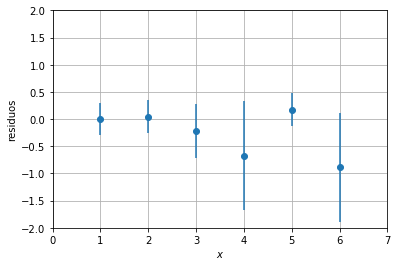

In [28]:
res = y -(b0+b1*x)
plt.errorbar(x,res,Dy,fmt='o')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('residuos')
plt.xlim(0,7)
plt.ylim(-2,2)

In [29]:
from scipy.optimize import curve_fit
#Funcion que no es un polinomio

In [32]:
def f(x,a,b):
    return a+b*np.log(x)

In [36]:
aa,ba = curve_fit(f,x,y,sigma=Dy)[0]

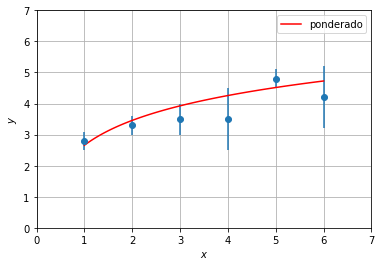

In [37]:
xx = np.linspace(1,6,100)
plt.plot(xx,f(xx,aa,ba), color= 'red',label='ponderado')
plt.errorbar(x,y,Dy,fmt='o')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,7)
plt.ylim(0,7)

(-2, 2)

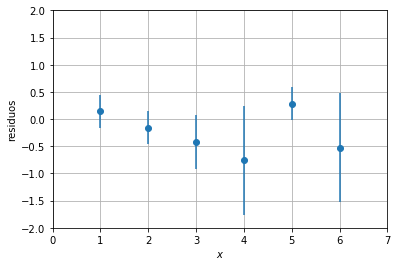

In [38]:
res = y -(f(x,aa,ba))
plt.errorbar(x,res,Dy,fmt='o')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('residuos')
plt.xlim(0,7)
plt.ylim(-2,2)

In [39]:
from scipy.optimize import leastsq

In [41]:
def respon(a,x,y,Dy):
    return (y-a[0]-a[1]*np.log(x))/Dy
#residuos/error en y si se ocupa leastsq

In [42]:
aa,ba

(2.6573989845608228, 1.1547185453450752)

In [43]:
a_in = [1,1]
aa2,ba2 = leastsq(respon, a_in, args= (x,y,Dy))[0]

In [44]:
print(aa,ba)
print(aa2,ba2)

2.65739898456 1.15471854535
2.6573989863 1.15471854957
